<a href="https://colab.research.google.com/github/Celsius1313/AdvancedAnalyticsML01/blob/main/AML_Project_EasyVisa_Prediction_Celsio_Cosme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1
#!pip install xgboost==2.0.3 -q --user

In [ ]:
#!pip install imblearn

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import pandas as pd                                                                                                     # Dataset Manipulation Library
import numpy as np                                                                                                      # Numerical Dataset Manipulation Library
import matplotlib.pyplot as plt                                                                                         # Visual Ploting library
import seaborn as sns                                                                                                   # Statistical Manipulation Library
from sklearn.tree import DecisionTreeClassifier                                                                         # Main Model Selection
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Models Selection to use the Main Model inside them
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV              # Training, Validation, Test Funcion; Cross Validation Function; Cross Validation Function Score; Tuning Function Method
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix                   # Model Scoring Validation Functions
from xgboost import XGBClassifier                                                                                       # Model Selection to use the Main Model inside him
from imblearn.under_sampling import RandomUnderSampler                                                                  # Data Balancement - Under Sampling
from imblearn.over_sampling import SMOTE                                                                                # Data Balancement - Over Sampling

In [ ]:
# This library is to ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\P4773\Documents\Desktop_Folder_CelsioCosme_Work\McCOMBS UNIVERSITY OF TEXAS -- PGP - AIML\HANDS-ON PROJECTS\ADVANCED MACHINE LEARNING PROJECT\EASY-VISA\EasyVisa.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data[::5000]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
5000,EZYV5001,Asia,Master's,N,N,972,1995,West,61196.1600,Year,Y,Certified
10000,EZYV10001,Asia,Bachelor's,N,N,1925,1986,West,51993.8200,Year,Y,Denied
15000,EZYV15001,North America,Master's,Y,N,1335,1898,Midwest,70897.0500,Year,Y,Certified
20000,EZYV20001,Asia,Bachelor's,N,N,2342,2007,Northeast,114357.3500,Year,Y,Denied
25000,EZYV25001,South America,Master's,Y,N,3204,1998,South,77003.2000,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
print("The dataset have", data.shape[0], "rows and", data.shape[1], "columns.", end="")

The dataset have 25480 rows and 12 columns.

##### **Observations:**
- The dataset have **25.480** rows and **12** columns.

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
print(data.nunique())

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64


In [ ]:
# Check "duplicated" values
data.duplicated().sum()

0

In [ ]:
# Check "null" values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# Check "na" values
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

##### **Observations:**
- The dataset have 3 data type: Object, Int64, Float64
- The dataset have no DUPLICATED row
- The dataset have no NA values
- The dataset have no NULL values

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


##### **Observations:**
- The dataset have some negative values in "no_of_employees" column that need to be fixed.
- For "prevailing_wage" we have to different values of wage, because of their unit.

#### Fixing the negative values in number of employees columns

In [ ]:
# Checking the negative values in "no_of_employees" column.
data[data["no_of_employees"] < 1].head(15)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
# Looking the unique values inside the column
data_employee = data[data["no_of_employees"] < 1].sort_values(by="no_of_employees", ascending=True)
print("'no_of_employees' feature before negative values treatment:\n", data_employee["no_of_employees"].sort_values(ascending=True).unique())

'no_of_employees' feature before negative values treatment:
 [-26 -25 -17 -14 -11]


In [ ]:
# Treatment of negative values in the "no_of_employees" column
data["no_of_employees"] = data["no_of_employees"].apply(lambda x: x*-1 if x < 0 else x)

##### **Observations:**
- The negative values in the dataset were treated by turn them into a positive values.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Checking the values inside each categorical columns with for loop
categorical_columns = data.select_dtypes(include="object").columns.to_list()
categorical_columns.remove(categorical_columns[0])
print("The categorical columns excluding 'case_id' are:\n", categorical_columns, end="\n\n")

for col in categorical_columns:
    print("**************************","\n", data[col].value_counts(), end="\n\n")

The categorical columns excluding 'case_id' are:
 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

**************************
 continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**************************
 education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

**************************
 has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

**************************
 requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

**************************
 region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

**************************
 unit_of_wage
Year     22962
Hour 

In [ ]:
for col in categorical_columns:
    print("******************************\n *** Values in Percentage ***\n", round(data[col].value_counts(normalize=True)*100, 2), end="\n\n")

******************************
 *** Values in Percentage ***
 continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

******************************
 *** Values in Percentage ***
 education_of_employee
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: proportion, dtype: float64

******************************
 *** Values in Percentage ***
 has_job_experience
Y    58.09
N    41.91
Name: proportion, dtype: float64

******************************
 *** Values in Percentage ***
 requires_job_training
N    88.4
Y    11.6
Name: proportion, dtype: float64

******************************
 *** Values in Percentage ***
 region_of_employment
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: proportion, dtype: float64

******************************
 *** Values in Percentage ***
 unit_

### Univariate Analysis

In [ ]:
# Function to plot a Histogram and a Boxplot together with a MEAN and MEDIAN line for Histogram - For a variable  at time
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="gold"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

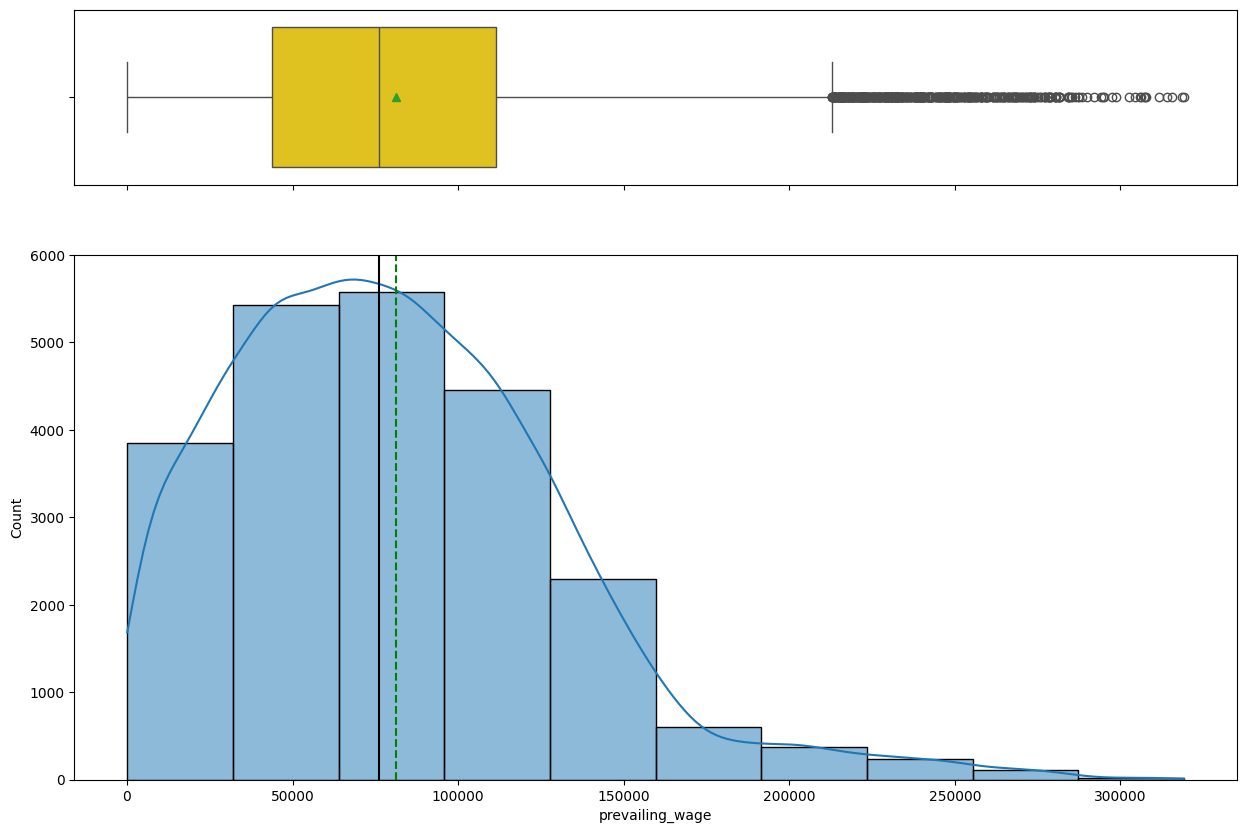

In [ ]:
histogram_boxplot(data[data["unit_of_wage"] == "Year"], "prevailing_wage", kde=True, bins=10)

- For the Annual Average Wage we have a **Median** around of **75K dollars** per year and a **Mean** of **80K dollar** per year.
- We have outlier for Annual Average Wage.

In [ ]:
# Function to create labeled barplots for Numerical and Non-numerical columns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show();  # show the plot

#### Observations on education of employee

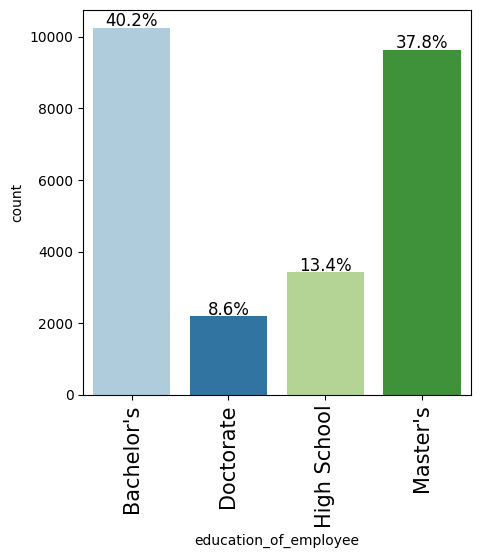

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

- More than **85%** of the **Applicants** have an academic level highier than the *High School*   

#### Observations on region of employment

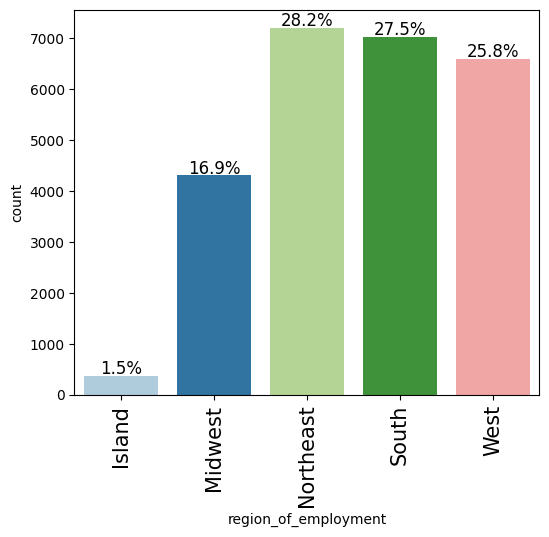

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

- **Northeast**, **South**, **West** have most of employement registration.   

#### Observations on job experience

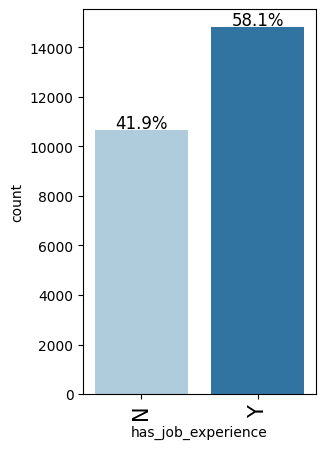

In [ ]:
labeled_barplot(data,"has_job_experience", perc=True)

- At least more than half of the **Applicants** have a job experience.

#### Observations on case status

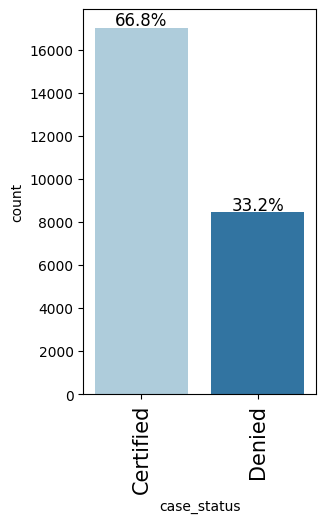

In [ ]:
labeled_barplot(data, "case_status", perc=True)

- From 25K registers at least more than **66%**, have their visa certified.

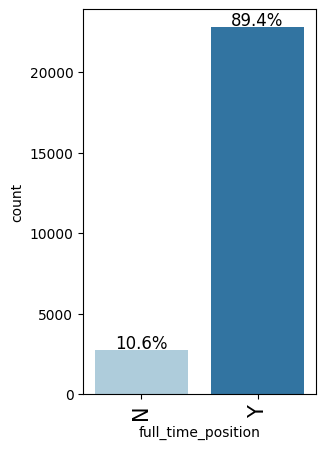

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)

- **89.4%** of jobs position are Full Time.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions of 2 variables
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="percent",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="percent",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

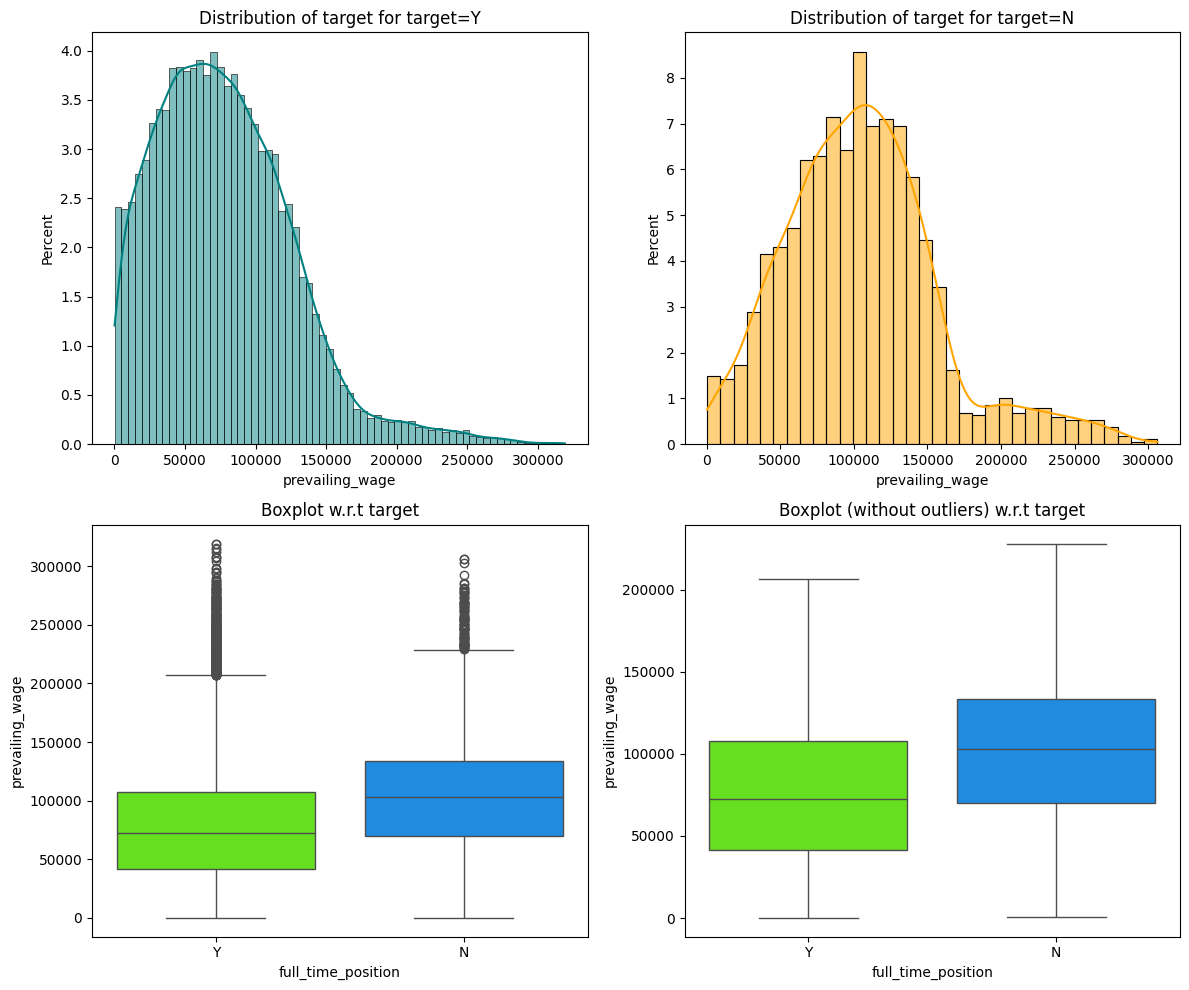

In [ ]:
distribution_plot_wrt_target(data[data["unit_of_wage"] == "Year"], "prevailing_wage", "full_time_position")

- In this plotting we can note that the Employees that don't have a Full time position have a little more probability to earn more than an Employee who have a Full Time positionm.

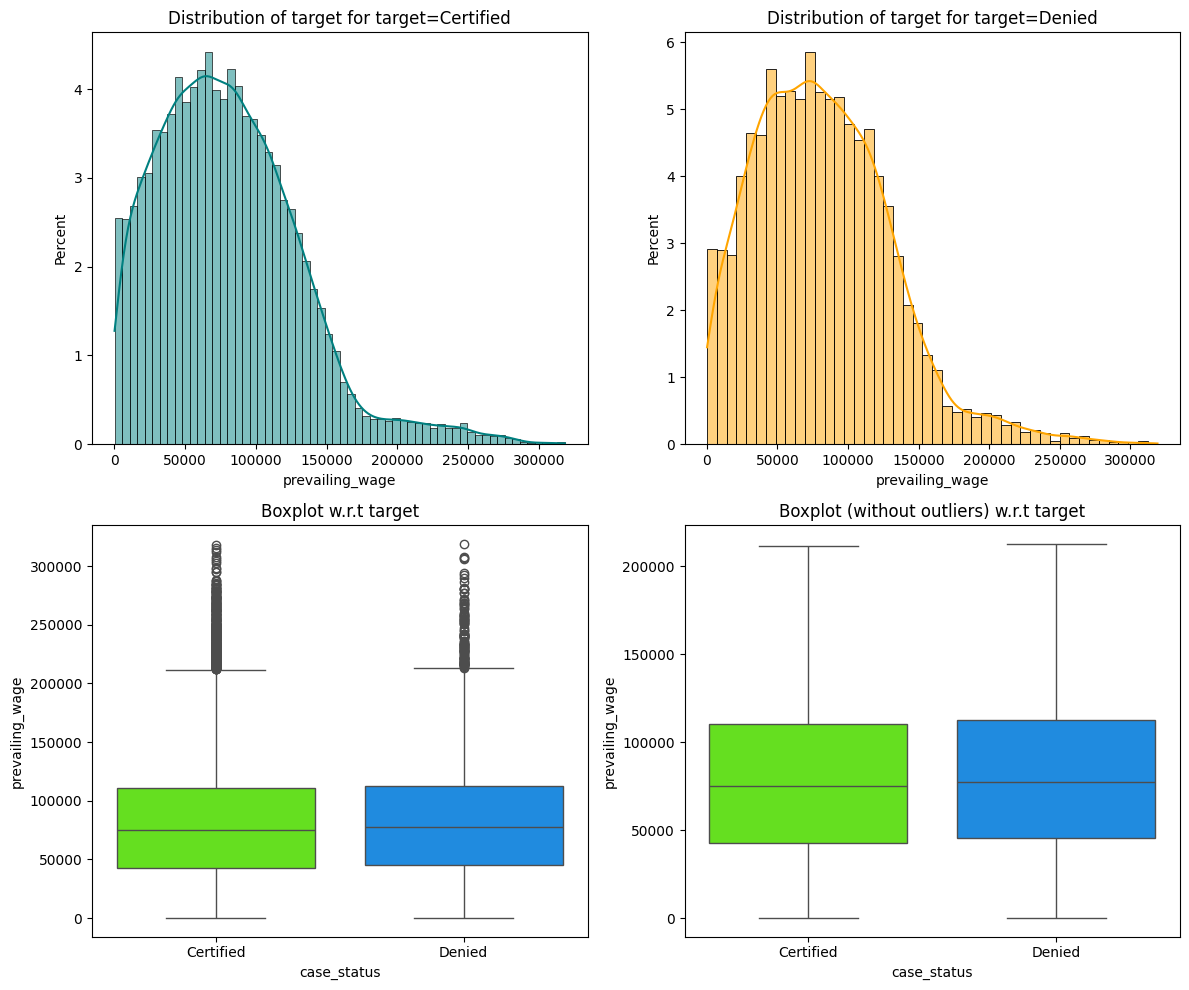

In [ ]:
distribution_plot_wrt_target(data[data["unit_of_wage"] == "Year"], "prevailing_wage", "case_status")

- Here we can check that have the Visa certified or denied do not will affect the prevailling wage.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


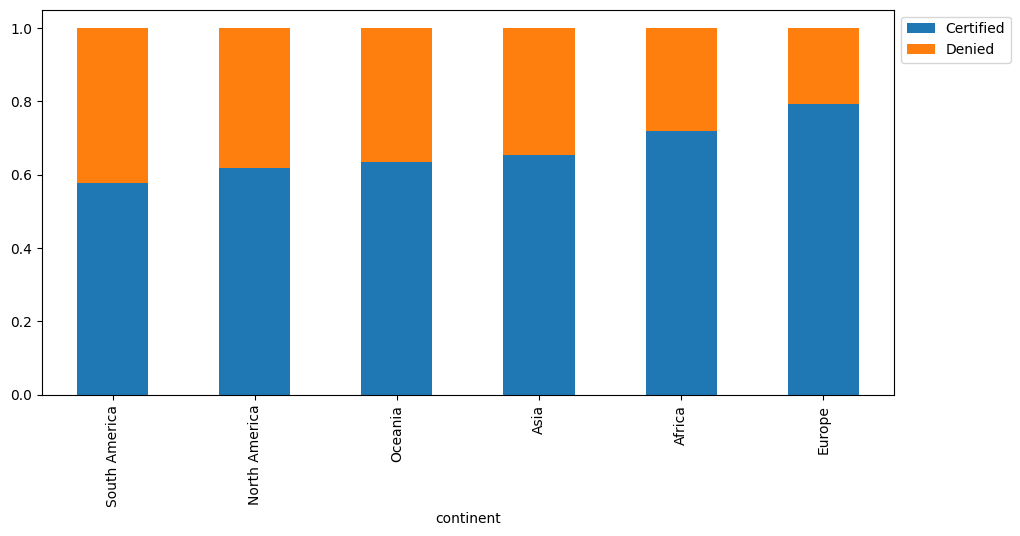

In [ ]:
stacked_barplot(data, "continent", "case_status")

- The Employee continent can affect the decision of certify or not a VISA, Europe and Africa the continents with that great chance.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


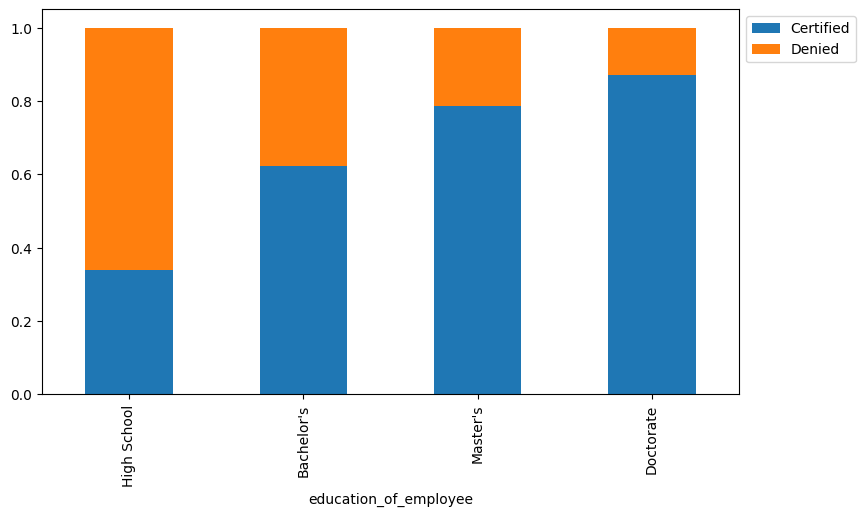

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

- Doctorate and Master degree have a great influence to certify or not a VISA.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


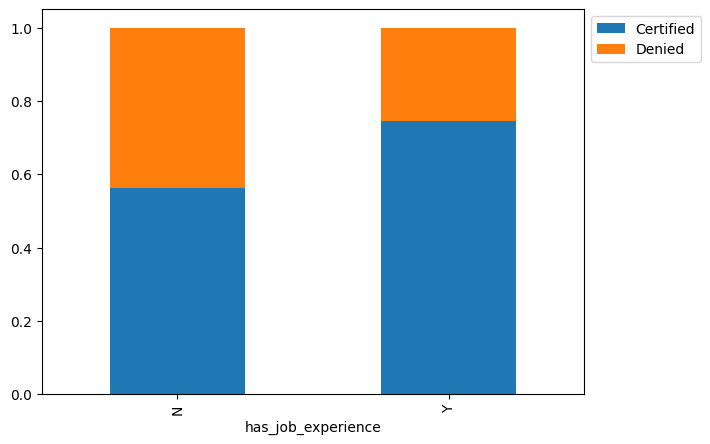

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

- At least **70%** of the Employee with job experience have their VISA certified.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


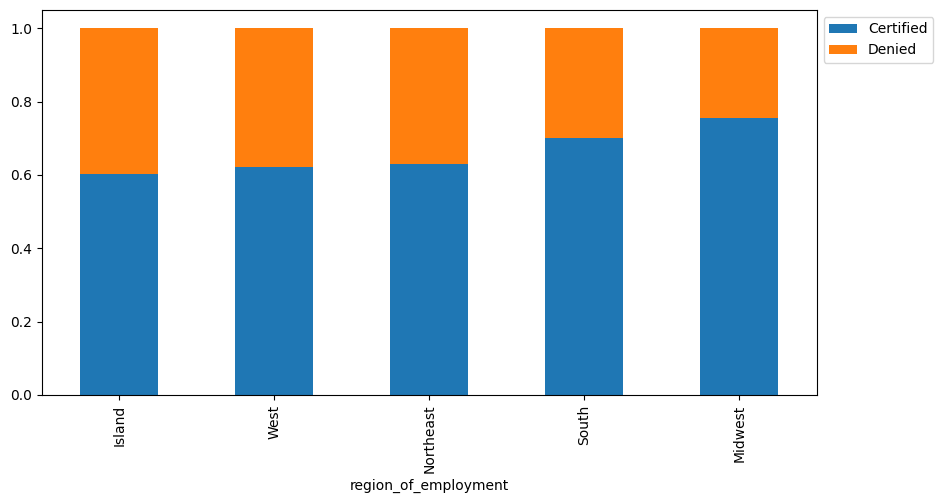

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


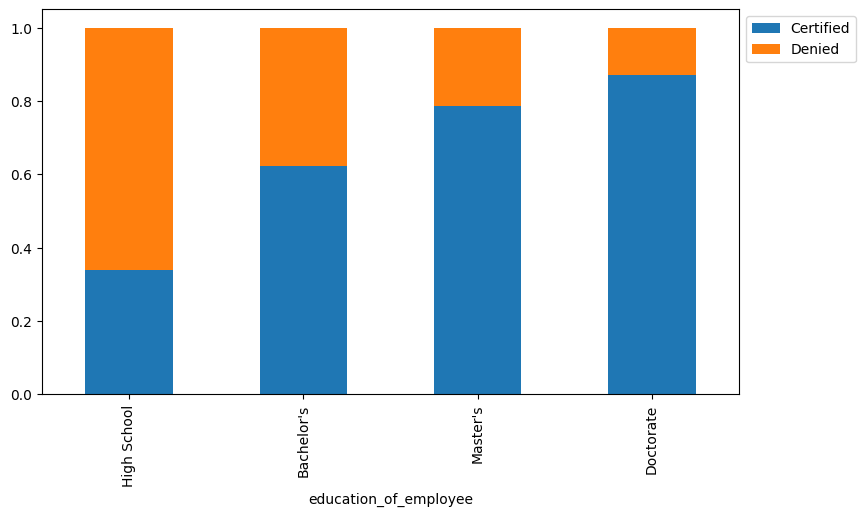

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


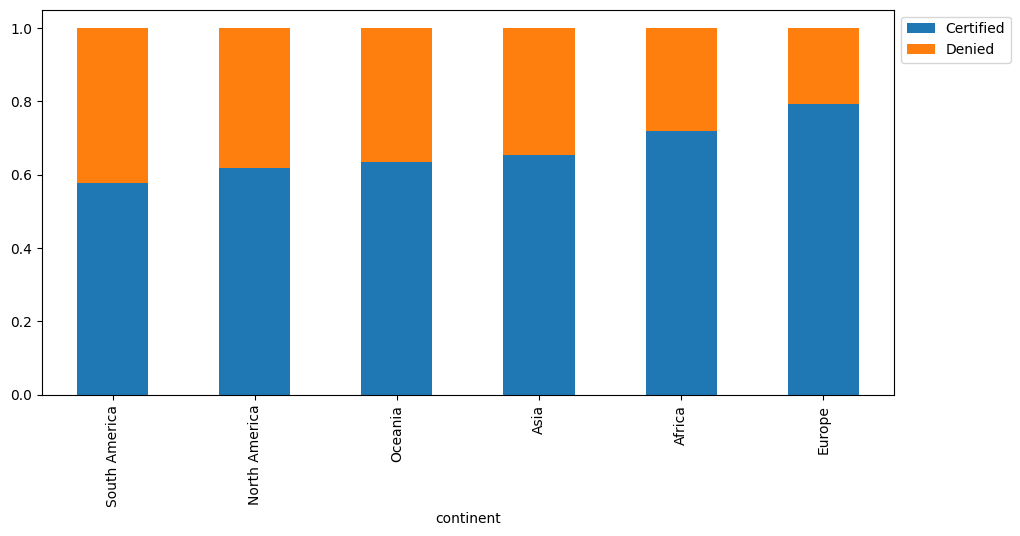

In [ ]:
stacked_barplot(data, "continent", "case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


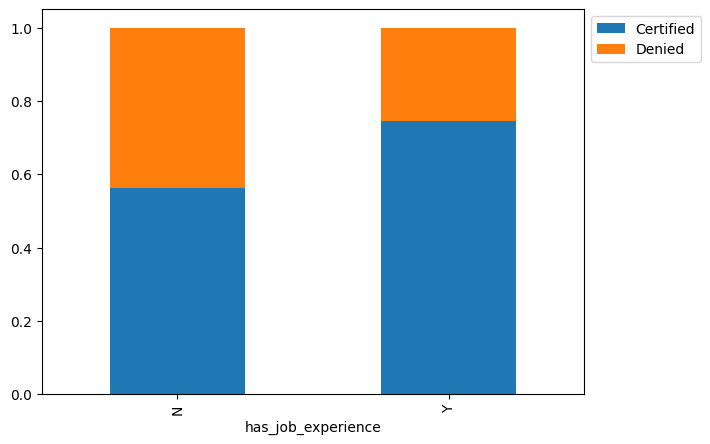

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

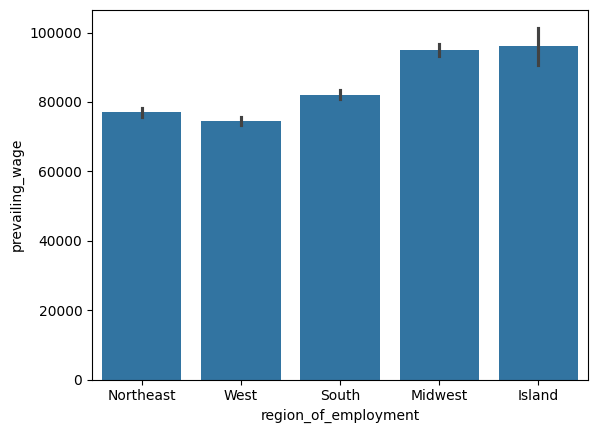

In [ ]:
sns.barplot(data[data["unit_of_wage"] == "Year"], x="region_of_employment", y="prevailing_wage");

- The Prevailing wage is similar in Northeast, West and South region.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

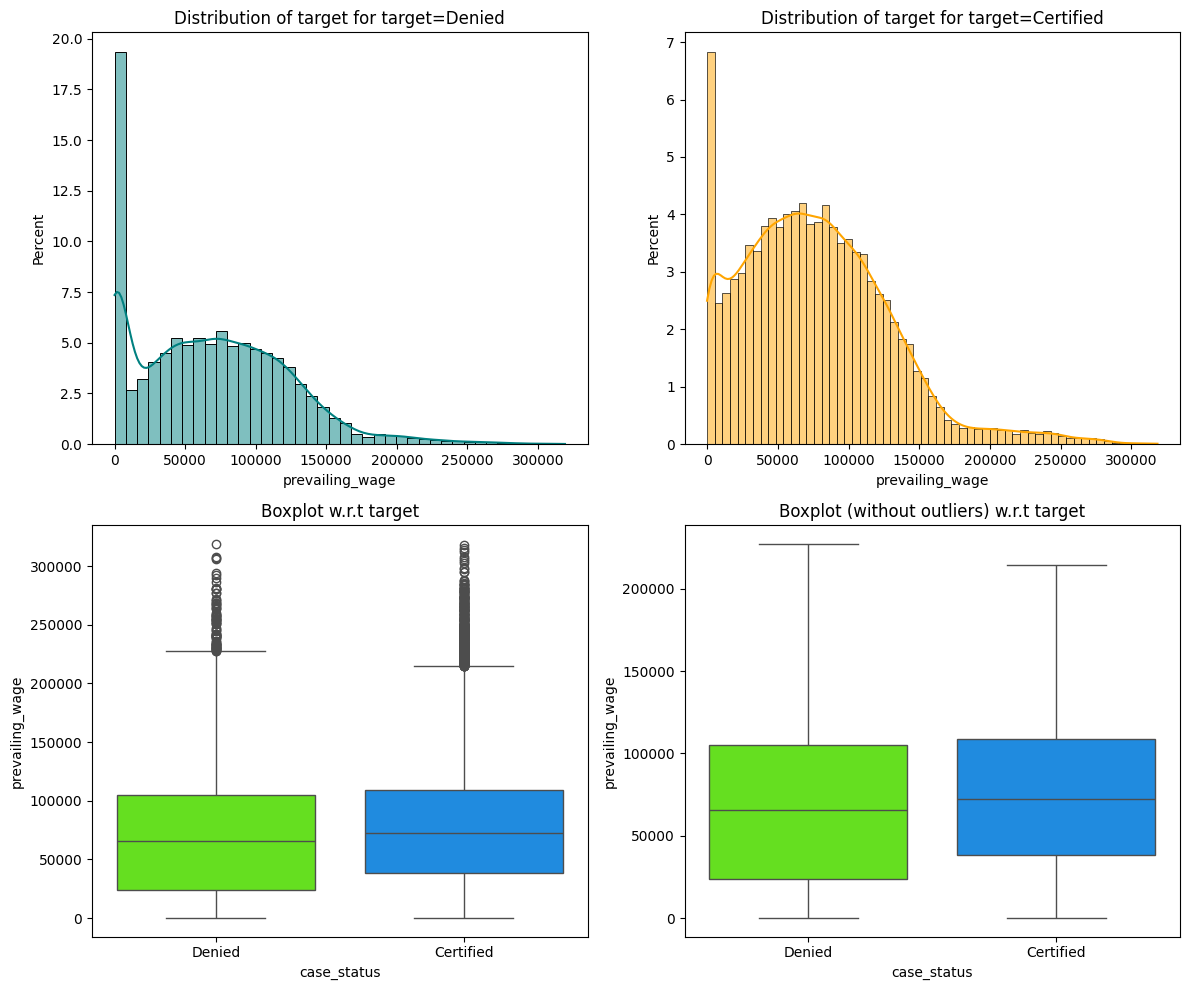

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


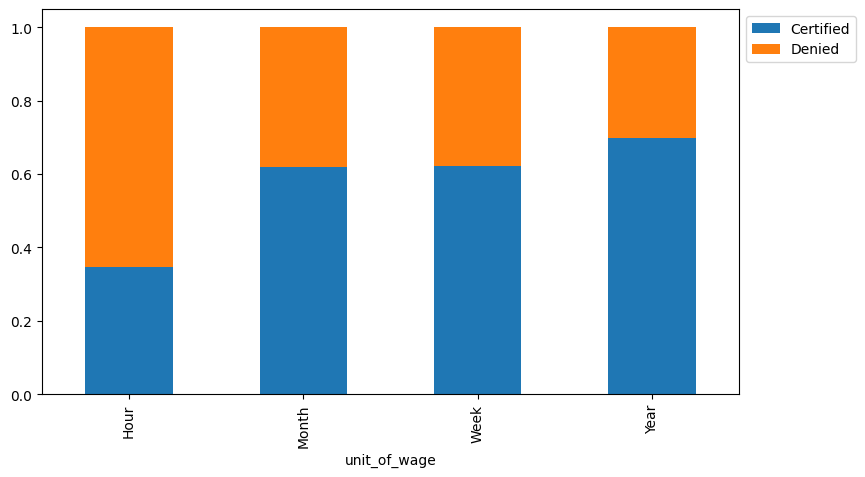

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status");

## Data Pre-processing

### Outlier Check

In [ ]:
# Calculagte IQR (Inter Quartile)
Q1 = data["prevailing_wage"].quantile(.25)
Q3 = data["prevailing_wage"].quantile(.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

print("For 'prevailing_wage' we have at least:", round(((data["prevailing_wage"] < lower_whisker) | (data["prevailing_wage"] > upper_whisker)).sum() /data.shape[0] * 100, 2), "%' of outliers", end="")

For 'prevailing_wage' we have at least: 1.68 %' of outliers

In this dataset we have only 3 numerical columns [prevailing_wage, no_of_employees, yr_of_estab], and the Outliers checking will make sense only in the prevailing_wage column/feature.
- After lookiing into the prevailing_wage, we found 1.68% of Outliers registers.
- Evaluating the situation of Outliers weight over the dataset, we may not need to treat them.

### Data Preparation for modeling

In [ ]:
# Creating a copy of the dataset and Converting/Encoding the Target Variable "case_status"
df = data.copy()
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Defining the X and Y sets
X = df.drop(["case_id", "case_status"], axis=1)
y = df["case_status"]


# Splitting the dataset into Train, Validation and Test
# 1. Splitting in Temporary_Train and Test
# We going to stratify the target variable to divide the sets with same proportion of Certified and Denied VISA
X_temporary, X_test, y_temporary, y_test = train_test_split(
    X, y, test_size=.25, random_state=1, stratify=y
)

# 2. Splitting in Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temporary, y_temporary, test_size=.3, random_state=1, stratify=y_temporary
)


In [ ]:
# Checking the Independent Variables shape and Dependent Variable Division
print("'Independ. Var' Training set have", X_train.shape[0], "rows and", X_train.shape[1], "columns.", end="\n")
print("'Independ. Var' Validation set have", X_val.shape[0], "rows and", X_val.shape[1], "columns.", end="\n")
print("'Independ. Var' Testing set have", X_test.shape[0], "rows and", X_test.shape[1], "columns.", end="\n\n")
print("*" * 62, end="\n\n")
print("'Depend. Var' - Training set Composition \n", round(y_train.value_counts(normalize=True) * 100, 2), end="\n\n")
print("'Depend. Var' - Validation set Composition \n", round(y_val.value_counts(normalize=True) * 100, 2), end="\n\n")
print("'Depend. Var' - Testing set Composition \n", round(y_test.value_counts(normalize=True) * 100, 2))

'Independ. Var' Training set have 13377 rows and 10 columns.
'Independ. Var' Validation set have 5733 rows and 10 columns.
'Independ. Var' Testing set have 6370 rows and 10 columns.

**************************************************************

'Depend. Var' - Training set Composition 
 case_status
1    66.79
0    33.21
Name: proportion, dtype: float64

'Depend. Var' - Validation set Composition 
 case_status
1    66.79
0    33.21
Name: proportion, dtype: float64

'Depend. Var' - Testing set Composition 
 case_status
1    66.8
0    33.2
Name: proportion, dtype: float64


In [ ]:
# Encoding Categorial Variables using the ONE-HOT ENCONDING technique
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

## Model Building

### Model Evaluation Criterion

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = round(accuracy_score(target, pred) * 100, 2)  # to compute Accuracy
    recall = round(recall_score(target, pred) * 100, 2)  # to compute Recall
    precision = round(precision_score(target, pred) * 100, 2)  # to compute Precision
    f1 = round(f1_score(target, pred) * 100, 2)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label");

In [ ]:
def boxplot_model_perf(model_name, model_result):
    """
    Function to plot boxplots to check the recall scores range of all models

    model_name: names - are the names of the models inside Models list
    model_result: results - are models recall scores before and after tuning the models
    """
    fig = plt.figure()
    fig.suptitle(" Algorithms Performance Comparision \n For All Cross Validation Results ")
    ax = fig.add_subplot(111)
    plt.boxplot(model_result)
    plt.xticks(rotation=60)
    ax.set_xticklabels(model_name)
    plt.show()

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
# Defining the Score [F1 Score, Precision, Recall or Accuracy] that will be used in initial Cross-validation and perhaps in hyperparameter tuning for all models
scorer = metrics.make_scorer(metrics.recall_score)

- The initial scorer choosen was **Recall**, to allow us predict the corrects **True Positives** cases, in others words to find the Employees with certified VISA

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
# Create a empty list to store all models
models = []

# Appeding all models to the empty list models
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1))) # Decision Tree is the main Model that will be used inside Bagging, AdaBoost or Gradient Boost models
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaptive Boosting", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Xtreme Gradient Boosting", XGBClassifier(random_state=1, eval_metric="logloss")))

In [ ]:
models

[('Decision Tree', DecisionTreeClassifier(random_state=1)),
 ('Random Forest', RandomForestClassifier(random_state=1)),
 ('Bagging', BaggingClassifier(random_state=1)),
 ('Adaptive Boosting', AdaBoostClassifier(random_state=1)),
 ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
 ('Xtreme Gradient Boosting',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_c

In [ ]:
# FIRST PERFORMANCE "NORMAL" - EVALUATION: Create 3 more empty list to store the model's: NAME, SCORE and RESULTS
results = []  # Empty list to store all model's CV recall scores for Training set
names = []  # Empty list to store name of the models
score = []  # Empty list to store all model's recall scores for Validation set

# Create two 'for' loops: Fisrt to evaluate the models Cross-Validation performance on training set, Second to evaluate the models performance on Validation set
print("Cross Validation: Recall Performance Evaluation on Training Set \n")
for name, model in models:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=kfold, scoring=scoring
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, round(cv_result.mean() * 100, 2)))

print("\n", "-" * 50, sep="")
print("\nPerformance Recall Evaluation on Validation Set \n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, round(scores * 100, 2)))


Cross Validation: Recall Performance Evaluation on Training Set 

Decision Tree: 74.37
Random Forest: 84.5
Bagging: 77.04
Adaptive Boosting: 88.9
Gradient Boosting: 87.73
Xtreme Gradient Boosting: 85.46

--------------------------------------------------

Performance Recall Evaluation on Validation Set 

Decision Tree: 72.94
Random Forest: 82.82
Bagging: 77.44
Adaptive Boosting: 87.86
Gradient Boosting: 86.84
Xtreme Gradient Boosting: 83.99


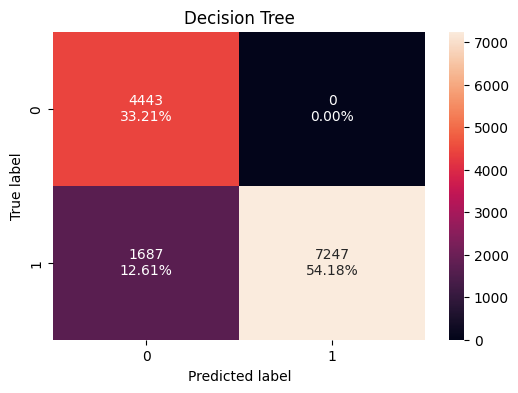

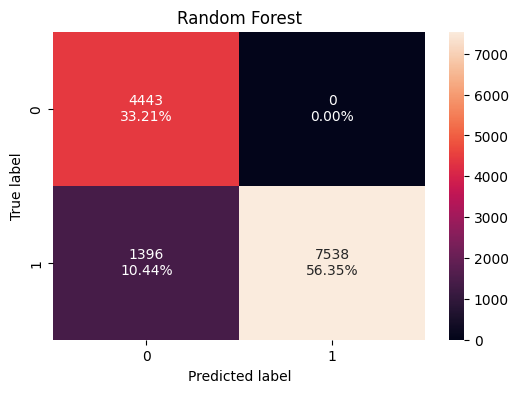

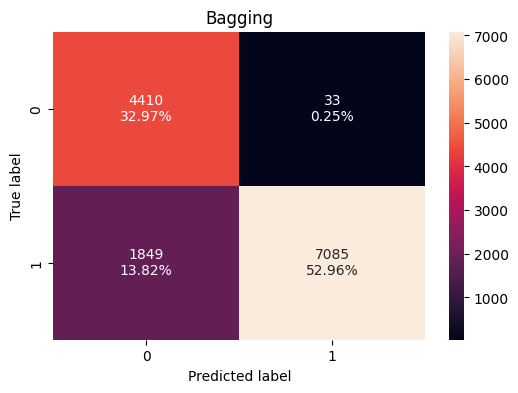

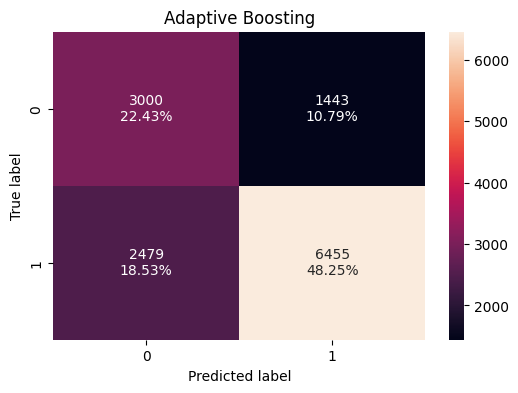

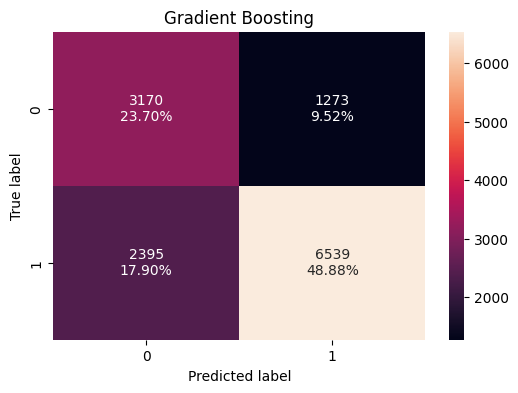

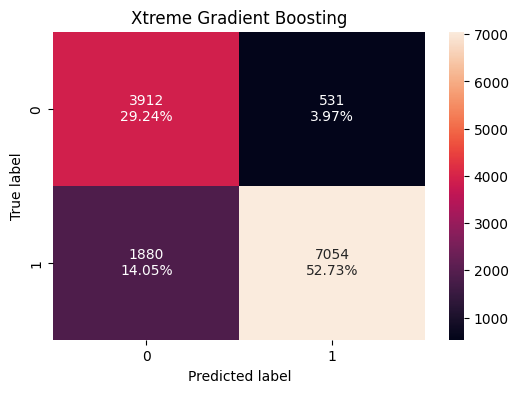

In [ ]:
# Checking Confusion Matrix Normal Models - For Training Set
for name, model in models:
    confusion_matrix_sklearn(model=model, predictors=X_train, target=y_train)
    plt.title(name)

------------------------------ Initial Models ------------------------------


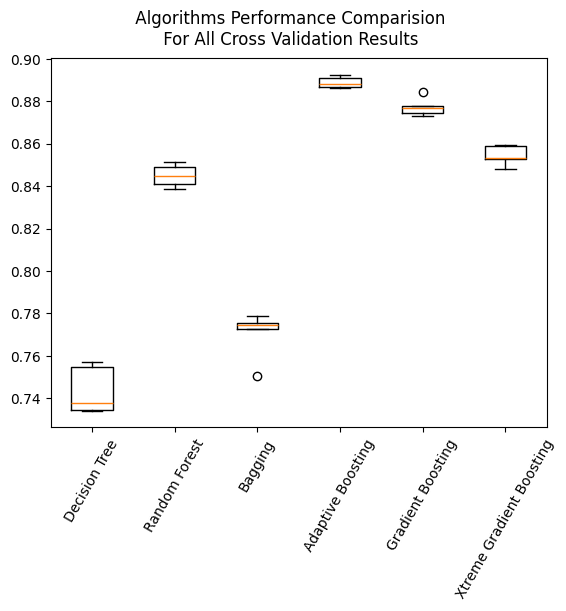

In [ ]:
# Checking models performance by ploting Boxplots function
print("-"*30, "Initial Models", "-"*30)
boxplot_model_perf(names, results)

### Model Building with oversampled data

In [ ]:
# Here we going to fit SMOTE (Synthetic Minority Oversampling Technique) on train set to Oversample the minority class
# We going to increase in .6 (60%) because our 3 sets are a little balanced and based on 5 nearest neighbors
smote = SMOTE(sampling_strategy=.6, k_neighbors=5, random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Checking the Target Variable composition before and after Oversampling
print("-- Target Variable before Oversampling --\n", y_train.value_counts())
print("-" * 50, "\n", sep="")
print("-- Target Variable after Oversampling --\n", y_train_oversampled.value_counts())
print("-" * 50, "\n", sep="")
print("Independent Variable Shape ", X_train_oversampled.shape, " and Target Variable Shape ", y_train_oversampled.shape, sep="")

-- Target Variable before Oversampling --
 case_status
1    8934
0    4443
Name: count, dtype: int64
--------------------------------------------------

-- Target Variable after Oversampling --
 case_status
1    8934
0    5360
Name: count, dtype: int64
--------------------------------------------------

Independent Variable Shape (14294, 21) and Target Variable Shape (14294,)


In [ ]:
models

[('Decision Tree', DecisionTreeClassifier(random_state=1)),
 ('Random Forest', RandomForestClassifier(random_state=1)),
 ('Bagging', BaggingClassifier(random_state=1)),
 ('Adaptive Boosting', AdaBoostClassifier(random_state=1)),
 ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
 ('Xtreme Gradient Boosting',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_c

In [ ]:
# SECOND PERFORMANCE "OVERSAMPLED" - EVALUATION: Create 3 more empty list to store the model's: NAME, SCORE and RESULTS
results1 = []  # Empty list to store all model's CV recall scores for Training set
names = []  # Empty list to store name of the models
score = []  # Empty list to store all model's recall scores for Validation set

# Create two 'for' loops: Fisrt to evaluate the models Cross-Validation performance on training set, Second to evaluate the models performance on Validation set
print("Cross Validation After Oversampling: Recall Performance Evaluation on Training Set \n")
for name, model in models:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_oversampled, y=y_train_oversampled, cv=kfold, scoring=scoring
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, round(cv_result.mean() * 100, 2)))

print("\n", "-" * 50, sep="")
print("\nPerformance After Oversampling: Recall Evaluation on Validation Set \n")
for name, model in models:
    model.fit(X_train_oversampled, y_train_oversampled)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, round(scores * 100, 2)))


Cross Validation After Oversampling: Recall Performance Evaluation on Training Set 

Decision Tree: 73.8
Random Forest: 83.71
Bagging: 76.74
Adaptive Boosting: 88.45
Gradient Boosting: 87.65
Xtreme Gradient Boosting: 84.98

--------------------------------------------------

Performance After Oversampling: Recall Evaluation on Validation Set 

Decision Tree: 72.84
Random Forest: 82.37
Bagging: 75.82
Adaptive Boosting: 88.14
Gradient Boosting: 86.24
Xtreme Gradient Boosting: 84.07


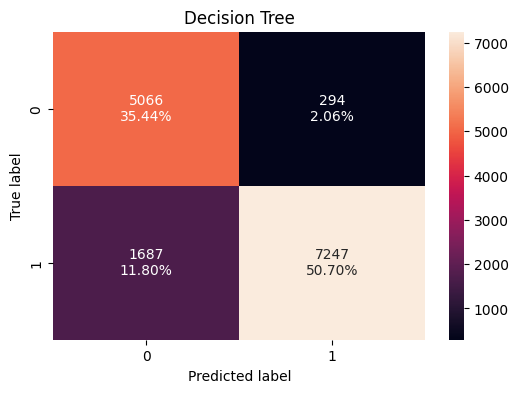

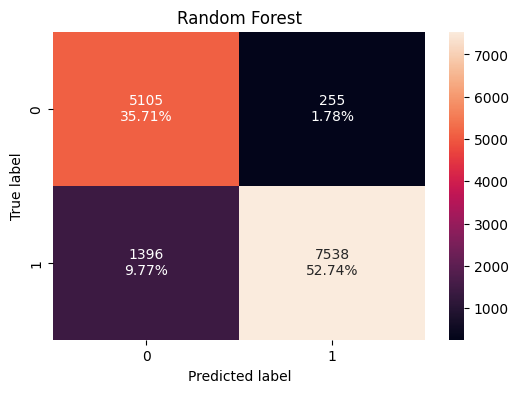

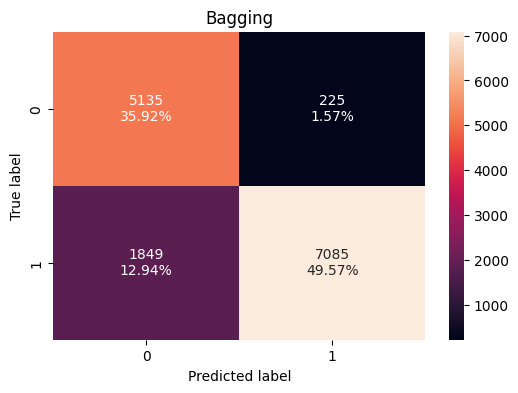

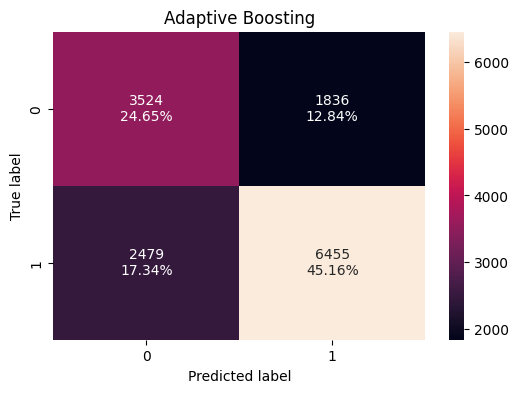

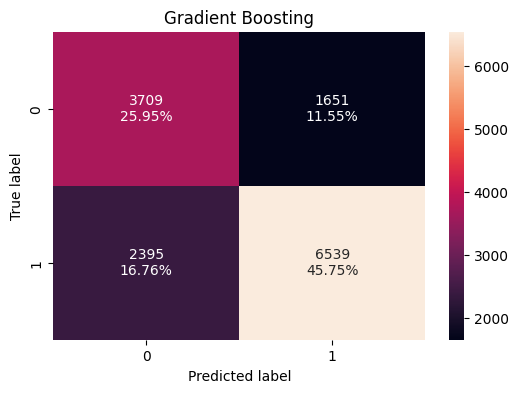

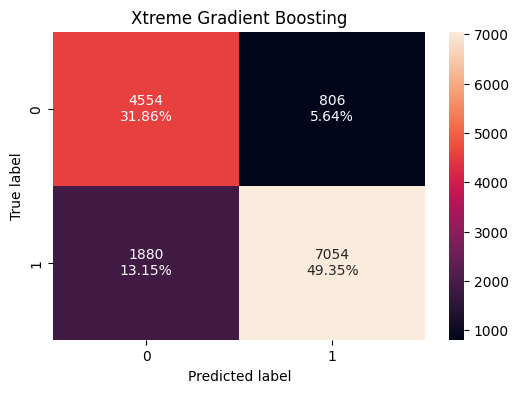

In [ ]:
# Checking Confusion Matrix Oversampled Models - For Training Set
for name, model in models:
    confusion_matrix_sklearn(model=model, predictors=X_train_oversampled, target=y_train_oversampled)
    plt.title(name)

------------------------------ Oversampled Models ------------------------------


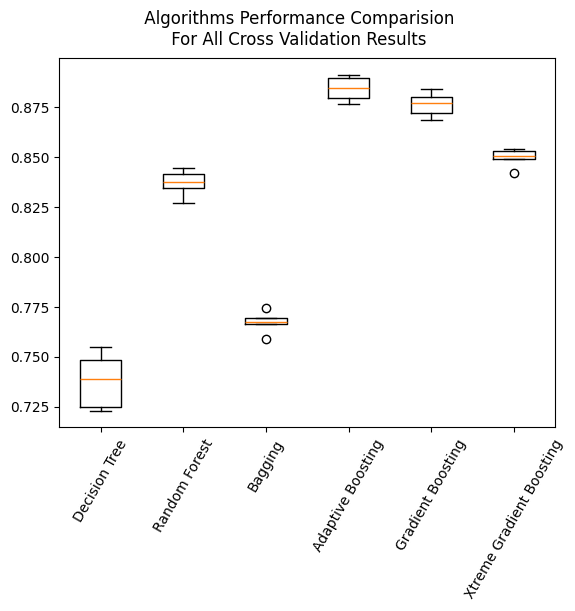

In [ ]:
# Checking models performance by ploting Boxplots function
print("-"*30, "Oversampled Models", "-"*30)
boxplot_model_perf(names, results1)

### Model Building with undersampled data

In [ ]:
# Now we going to fit RandomUnderSampler on train set to Undersample the majority class
RandUnderSampler = RandomUnderSampler(sampling_strategy=1, random_state=1)
X_train_undersampled, y_train_undersampled = RandUnderSampler.fit_resample(X_train, y_train)

In [ ]:
# Checking the Target Variable composition before and after Undersampling
print("-- Target Variable before Undersampling --\n", y_train.value_counts())
print("-" * 50, "\n", sep="")
print("-- Target Variable after Undersampling --\n", y_train_undersampled.value_counts())
print("-" * 50, "\n", sep="")
print("Independent Variable Shape ", X_train_undersampled.shape, " and Target Variable Shape ", y_train_undersampled.shape, sep="")

-- Target Variable before Undersampling --
 case_status
1    8934
0    4443
Name: count, dtype: int64
--------------------------------------------------

-- Target Variable after Undersampling --
 case_status
0    4443
1    4443
Name: count, dtype: int64
--------------------------------------------------

Independent Variable Shape (8886, 21) and Target Variable Shape (8886,)


In [ ]:
models

[('Decision Tree', DecisionTreeClassifier(random_state=1)),
 ('Random Forest', RandomForestClassifier(random_state=1)),
 ('Bagging', BaggingClassifier(random_state=1)),
 ('Adaptive Boosting', AdaBoostClassifier(random_state=1)),
 ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
 ('Xtreme Gradient Boosting',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_c

In [ ]:
# THIRD PERFORMANCE "UNDERSAMPLED" - EVALUATION: Create 3 more empty list to store the model's: NAME, SCORE and RESULTS
results2 = []  # Empty list to store all model's CV recall scores for Training set
names = []  # Empty list to store name of the models
score = []  # Empty list to store all model's recall scores for Validation set

# Create two 'for' loops: Fisrt to evaluate the models Cross-Validation performance on training set, Second to evaluate the models performance on Validation set
print("Cross Validation After Undersampling: Recall Performance Evaluation on Training Set \n")
for name, model in models:
    scoring = scorer
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_undersampled, y=y_train_undersampled, cv=kfold, scoring=scoring
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, round(cv_result.mean() * 100, 2)))

print("\n", "-" * 50, sep="")
print("\nPerformance After Undersampling: Recall Evaluation on Validation Set \n")
for name, model in models:
    model.fit(X_train_undersampled, y_train_undersampled)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, round(scores * 100, 2)))


Cross Validation After Undersampling: Recall Performance Evaluation on Training Set 

Decision Tree: 62.57
Random Forest: 67.77
Bagging: 61.17
Adaptive Boosting: 71.12
Gradient Boosting: 71.1
Xtreme Gradient Boosting: 68.67

--------------------------------------------------

Performance After Undersampling: Recall Evaluation on Validation Set 

Decision Tree: 61.22
Random Forest: 67.41
Bagging: 60.85
Adaptive Boosting: 71.43
Gradient Boosting: 71.9
Xtreme Gradient Boosting: 68.53


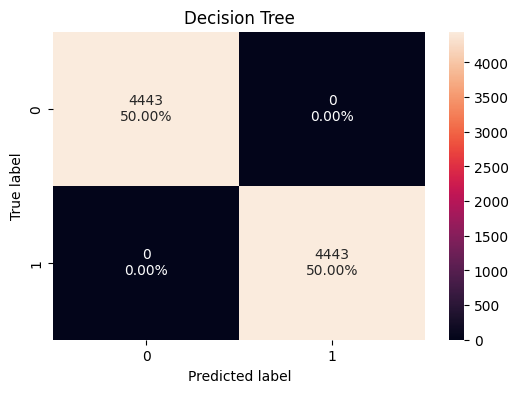

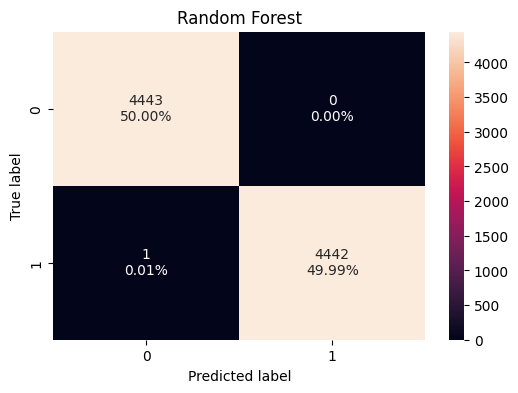

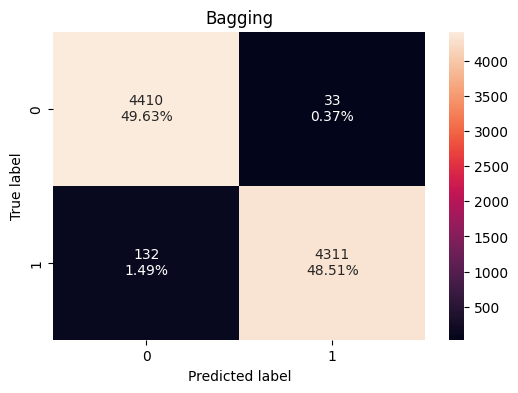

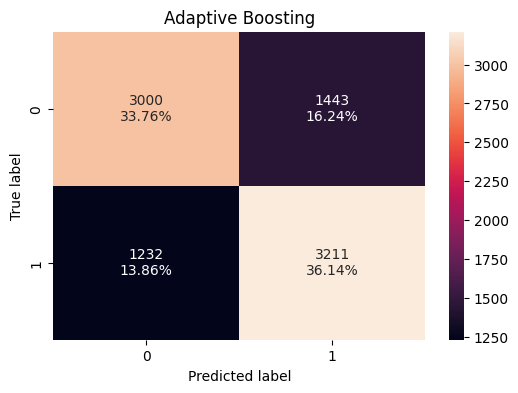

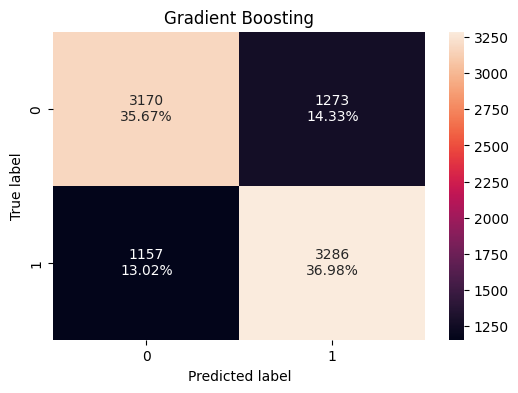

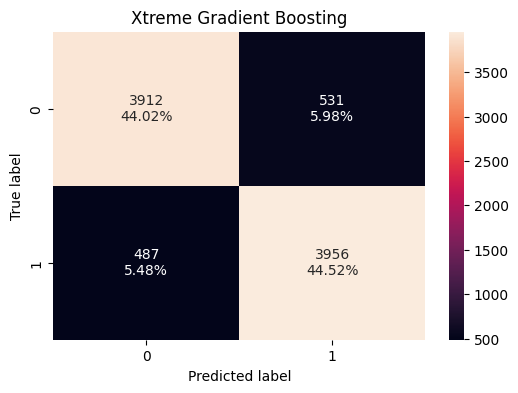

In [ ]:
# Checking Confusion Matrix Normal Models - For Training Set
for name, model in models:
    confusion_matrix_sklearn(model=model, predictors=X_train_undersampled, target=y_train_undersampled)
    plt.title(name)

------------------------------ Undersampled Models ------------------------------


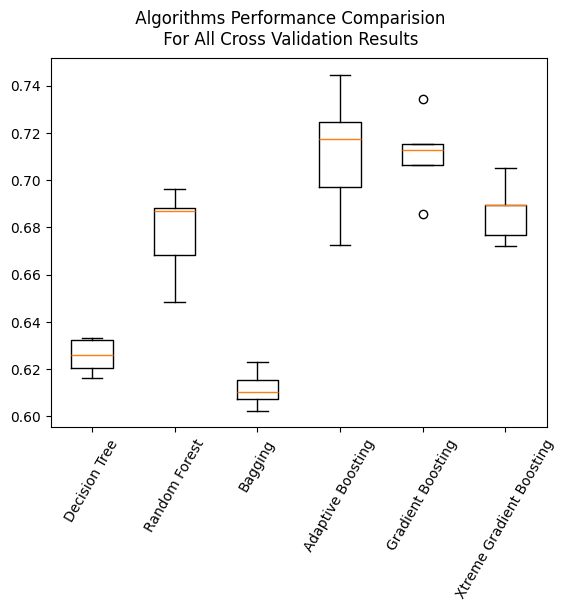

In [ ]:
# Checking models performance by ploting Boxplots function
print("-"*30, "Undersampled Models", "-"*30)
boxplot_model_perf(names, results2)

## Hyperparameter Tuning

The models that I choose are:
1. Random Forest Initial
2. Adaptive Boosting Oversampled
3. Xtreme Gradient Boosting Oversampled

Because their cross validation results were too consistent, their generalize well and behavior good with unseen data (**Validation Set**), with a realistic performance when we refer to **recall metric**.

##### **Random Forest Tuning - RandomizedSearchCV**

Build the RandomizedSearchCV

In [ ]:
# Creating the model
rf_model = RandomForestClassifier(random_state=1)

# Setting the parameters to pass in RandomizedSearchCV
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 4, 5, 10],
    "min_samples_split": [2, 4, 7, 10, 15],
    "class_weight": ["balanced", "balanced_subsample", None]

}

# Evaluating Scorer
scorer # => This variable come from the initial recall_score setting above
scorer1 = metrics.make_scorer(metrics.precision_score)
scorer2 = metrics.make_scorer(metrics.f1_score)

# Creating the RandomizedSearchCV
randomizedSearch_CV = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=parameters_grid,
    n_iter=30,
    scoring=scorer2, # F1 Score decrease de FP and FN, to do not drop down the performance of Recall and Precision
    cv=5,
    random_state=1
)

# Fitting the train set with RandomizedSearchCV
randomizedSearch_CV.fit(X_train, y_train)


# Print the Best Parameters
print(
    "Best parameters are {} with CV score= {}%".format(
        randomizedSearch_CV.best_params_, round(randomizedSearch_CV.best_score_ * 100, 2)
    )
)


Best parameters are {'min_samples_split': 4, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None} with CV score= 82.81%


Build the **Random Forest Initial** Model with **RandomizedSearchCV** best parameters

In [ ]:
# Creating the tuned Random Forest
rforest_model_tuned = RandomForestClassifier(
    min_samples_split= 4, max_depth= 10, criterion= "gini", class_weight=None, random_state=1
)

# Fit the model on training set
rforest_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=1)

Performance Check: **Random Forest Initial** Model with **RandomizedSearchCV** best parameters

In [ ]:
rforest_model_tuned_perfomance_train = model_performance_classification_sklearn(rforest_model_tuned, X_train, y_train)
print("Training performance:")
rforest_model_tuned_perfomance_train

Training performance:


,Accuracy,Recall,Precision,F1
0,78.44,91.56,79.34,85.01


In [ ]:
rforest_model_tuned_perfomance_validation = model_performance_classification_sklearn(rforest_model_tuned, X_val, y_val)
print("Validation performance:")
rforest_model_tuned_perfomance_validation

Validation performance:


,Accuracy,Recall,Precision,F1
0,74.31,87.93,76.91,82.05


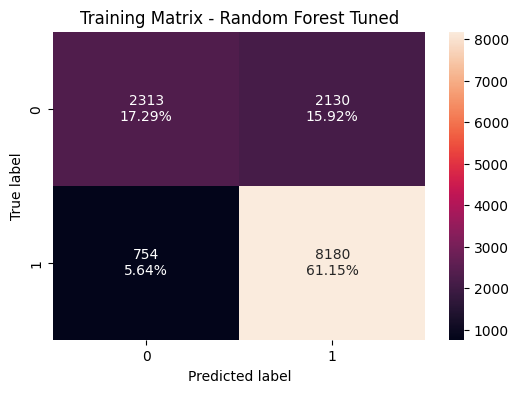

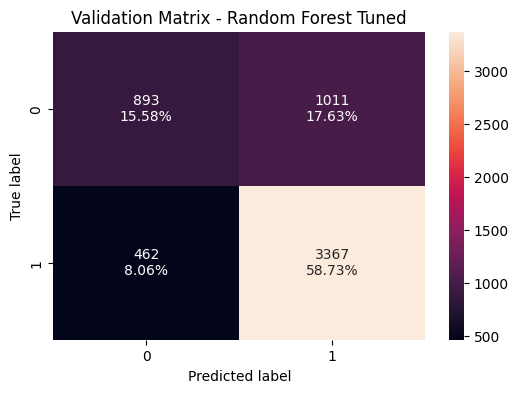

In [ ]:
confusion_matrix_sklearn(rforest_model_tuned, X_train, y_train)
plt.title("Training Matrix - Random Forest Tuned")
confusion_matrix_sklearn(rforest_model_tuned, X_val, y_val)
plt.title("Validation Matrix - Random Forest Tuned");

##### **Observation**
Random Forest Tuned with RandomSearchCV that have as a scorer F1, to reduce FP and FN and maintain a good performance for Recall and Precision

##### **Adaptive Boosting Tuning - RandomizedSearchCV**

Build the RandomizedSearchCV

In [ ]:
# Creating the model
adaboost_model = AdaBoostClassifier(random_state=1)

# Setting the parameters to pass in RandomizedSearchCV
parameters_grid = {
    "n_estimators": np.arange(50, 200, 50),
    "learning_rate": [.1, .3, .5, 1],
    "estimator": [DecisionTreeClassifier(max_depth=1, min_samples_split=10, min_samples_leaf=5, criterion="gini", splitter="best", class_weight="balanced"), DecisionTreeClassifier(max_depth=2, min_samples_split=10, min_samples_leaf=5, criterion="gini", splitter="random", class_weight="balanced"),
                  DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, criterion="entropy", splitter="best", class_weight="balanced"), DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, criterion="entropy", splitter="random", class_weight="balanced")]
}

# Evaluating Scorer
scorer # => This variable come from the initial recall_score setting above
scorer1 = metrics.make_scorer(metrics.precision_score) # Try to improve the precision looking to best Precision Score
scorer2 = metrics.make_scorer(metrics.f1_score) # Try to improve balance the precision and recall looking to best F1 Score

# Creating the RandomizedSearchCV
randomizedSearch_CV1 = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=parameters_grid,
    scoring=scorer,
    n_iter=30,
    cv=5,
    n_jobs= -1,
    random_state=1
)

# Fitting the train oversampled set with RandomizedSearchCV
randomizedSearch_CV1.fit(X_train_oversampled, y_train_oversampled)


# Print the Best Parameters
print(
    "Best parameters are {} with CV score= {}%".format(
        randomizedSearch_CV1.best_params_, round(randomizedSearch_CV1.best_score_ * 100, 2)
    )
)


Best parameters are {'n_estimators': 150, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=5,
                       min_samples_split=10)} with CV score= 93.35%


In [ ]:
# Creating the tuned Adaptive Boosting
adaboost_tuned_model = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(criterion="gini", class_weight="balanced", max_depth=1, min_samples_leaf=5, min_samples_split=10),
    n_estimators= 150,
    learning_rate=.1
)

# Fit the model on training set
adaboost_tuned_model.fit(X_train_oversampled, y_train_oversampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    min_samples_leaf=5,
                                                    min_samples_split=10),
                   learning_rate=0.1, n_estimators=150)

Performance Check: **Adaptive Boosting with oversample data** Model with **RandomizedSearchCV** best parameters

In [ ]:
adaboost_tuned_model_perfomance_train = model_performance_classification_sklearn(adaboost_tuned_model, X_train_oversampled, y_train_oversampled)
print("Training performance:")
adaboost_tuned_model_perfomance_train

Training performance:


,Accuracy,Recall,Precision,F1
0,69.71,93.35,69.07,79.39


In [ ]:
adaboost_tuned_model_perfomance_validation = model_performance_classification_sklearn(adaboost_tuned_model, X_val, y_val)
print("Validation performance:")
adaboost_tuned_model_perfomance_validation

Validation performance:


,Accuracy,Recall,Precision,F1
0,71.01,92.71,71.96,81.03


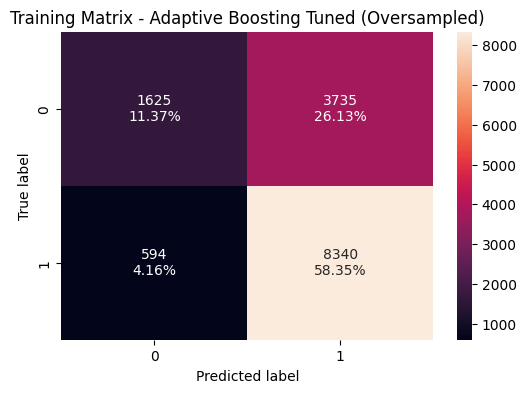

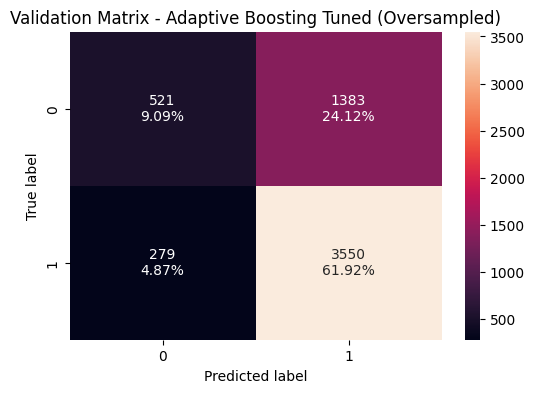

In [ ]:
confusion_matrix_sklearn(adaboost_tuned_model, X_train_oversampled, y_train_oversampled)
plt.title("Training Matrix - Adaptive Boosting Tuned (Oversampled)")
confusion_matrix_sklearn(adaboost_tuned_model, X_val, y_val)
plt.title("Validation Matrix - Adaptive Boosting Tuned (Oversampled)");

##### **Observation**
Adaboost Tuned with RandomSearchCV that have their scorer Recall or F1 on oversampled data, that have the same result when we fit the final model.

##### **Xtreme Gradient Boosting Tuning - RandomizedSearchCV**

In [ ]:
# Creating the model
xgboost_model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting the parameters to pass in RandomizedSearchCV
parameters_grid = {
        "n_estimators": np.arange(50, 350, 50),
        "learning_rate": np.arange(.1, .6, .1),
        "max_depth": np.arange(1, 6, 1),
        "scale_pos_weight": [2, 5, 10],          # Improve the balance between classes, increasing the minority class
        "gamma": [1 ,2, 3, 5],                    # Control the tree complexity avoiding the overfitting (The Greater the Better)
        "subsample": [.8, .9],                    # Reduce the tree variance and can improve the Precision
        "reg_alpha": [0.1, 1, 5],                 # L1 regularization, eliminate the irrelevante variables and can improve the Precision
        "reg_lambda": np.arange(5, 25, 5)        # L2 regularization, reduce the over fitting and balance the classes weight, improving the precision
}

# Evaluating Scorer
scorer # => This variable come from the initial recall_score setting above
scorer1 = metrics.make_scorer(metrics.precision_score)
scorer2 = metrics.make_scorer(metrics.f1_score)

# Creating the RandomizedSearchCV
randomizedSearch_CV2 = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=parameters_grid,
    scoring=scorer2,
    n_iter=30,
    cv=5,
    n_jobs= -1,
    random_state=1
)

# Fitting the train oversampled set with RandomizedSearchCV
randomizedSearch_CV2.fit(X_train_oversampled, y_train_oversampled)


# Print the Best Parameters
print(
    "Best parameters are {} with CV score= {}%".format(
        randomizedSearch_CV2.best_params_, round(randomizedSearch_CV2.best_score_ * 100, 2)
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.30000000000000004, 'gamma': 2} with CV score= 79.98%


In [ ]:
# Creating the tuned Xtreme Gradient Boosting
xgboost_tuned_model = XGBClassifier(
        n_estimator= 250,
        scale_pos_weight= 2,   # Improve the balance between classes, increasing the minority class
        max_depth= 5,
        learning_rate= 0.30000000000000004,
        gamma= 2,               # Control the tree complexity avoiding the overfitting (The Greater the Better)
        subsample= .9,          # Reduce the tree variance and can improve the Precision
        reg_alpha= .1,          # L1 regularization, eliminate the irrelevante variables and can improve the Precision
        reg_lambda= 5           # L2 regularization, reduce the over fitting and balance the classes weight, improving the precision
)


# # Fit the model on training set
xgboost_tuned_model.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.30000000000000004, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=250, n_estimators=None,
              n_jobs=None, ...)

In [ ]:
xgboost_tuned_model_perfomance_train = model_performance_classification_sklearn(xgboost_tuned_model, X_train_oversampled, y_train_oversampled)
print("Training performance:")
xgboost_tuned_model_perfomance_train

Training performance:


,Accuracy,Recall,Precision,F1
0,76.54,96.8,73.81,83.76


In [ ]:
xgboost_tuned_model_perfomance_validation = model_performance_classification_sklearn(xgboost_tuned_model, X_val, y_val)
print("Validation performance:")
xgboost_tuned_model_perfomance_validation

Validation performance:


,Accuracy,Recall,Precision,F1
0,72.6,94.36,72.73,82.14


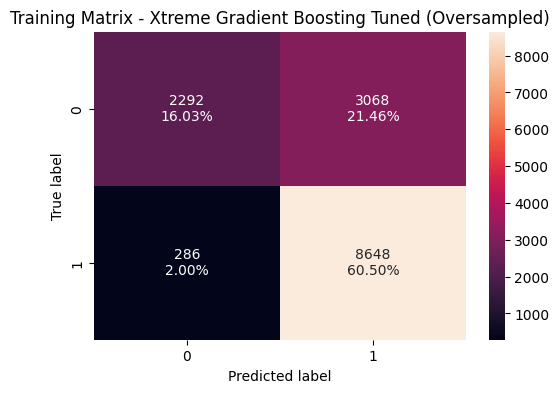

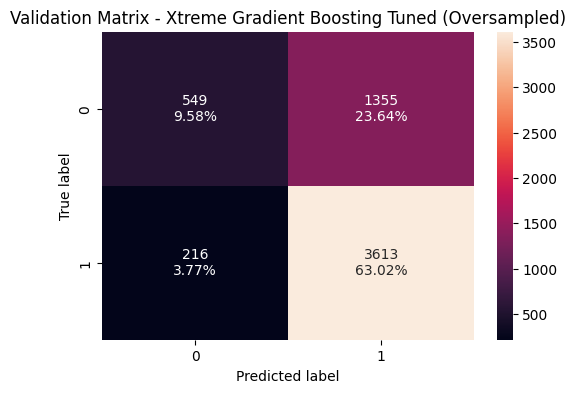

In [ ]:
confusion_matrix_sklearn(xgboost_tuned_model, X_train_oversampled, y_train_oversampled)
plt.title("Training Matrix - Xtreme Gradient Boosting Tuned (Oversampled)")
confusion_matrix_sklearn(xgboost_tuned_model, X_val, y_val)
plt.title("Validation Matrix - Xtreme Gradient Boosting Tuned (Oversampled)");

#### **Observation**
XGBoost Tuned with RandomSearchCV that have as a scorer F1, to reduce FP and FN and maintain a good performance for Recall and Precision

## Model Performances

In [ ]:
# Creating the Performance Comparison

models_comparision_df = pd.concat(
    [
        rforest_model_tuned_perfomance_train.T,
        rforest_model_tuned_perfomance_validation.T,
        rforest_model_tuned_perfomance_validation.T - rforest_model_tuned_perfomance_train.T,
        adaboost_tuned_model_perfomance_train.T,
        adaboost_tuned_model_perfomance_validation.T,
        adaboost_tuned_model_perfomance_validation.T - adaboost_tuned_model_perfomance_train.T,
        xgboost_tuned_model_perfomance_train.T,
        xgboost_tuned_model_perfomance_validation.T,
        xgboost_tuned_model_perfomance_validation.T - xgboost_tuned_model_perfomance_train.T,
    ],
    axis=1,
)
models_comparision_df.columns = [
    "Training Random Forest (default)",
    "Validation Random Forest (default)",
    "Default - Diff",
    "Training AdaBoost (Oversampled)",
    "Validation AdaBoost (Oversampled)",
    "AdaBoost (Oversampled) - Diff",
    "Training XGBoost (Oversampled)",
    "Validation XGBoost (Oversampled)",
    "XGBoost (Oversampled) - Diff",
]
print("***"*32, "Model Performance Comparison 'MPC'", "***"*32)
models_comparision_df

************************************************************************************************ Model Performance Comparison 'MPC' ************************************************************************************************


,Training Random Forest (default),Validation Random Forest (default),Default - Diff,Training AdaBoost (Oversampled),Validation AdaBoost (Oversampled),AdaBoost (Oversampled) - Diff,Training XGBoost (Oversampled),Validation XGBoost (Oversampled),XGBoost (Oversampled) - Diff
Accuracy,78.44,74.31,-4.13,69.71,71.01,1.30,76.54,72.60,-3.94
Recall,91.56,87.93,-3.63,93.35,92.71,-0.64,96.80,94.36,-2.44
Precision,79.34,76.91,-2.43,69.07,71.96,2.89,73.81,72.73,-1.08
F1,85.01,82.05,-2.96,79.39,81.03,1.64,83.76,82.14,-1.62


The Choosen Model is XGBoost, because is a balanced model, for this situation that we need to predict which employee will have their visa certified and be able to ensure that we don't lose time seeking/working in process that their visa will be denied, I choose a the model that can give it to us.

In [ ]:
final_model = model_performance_classification_sklearn(xgboost_tuned_model, X_test, y_test)
final_model

,Accuracy,Recall,Precision,F1
0,71.99,94.64,72.13,81.87


In [ ]:
# Final model performance in all sets
final_models_comparision_df = pd.concat(
    [
        xgboost_tuned_model_perfomance_train.T,
        xgboost_tuned_model_perfomance_validation.T,
        final_model.T
    ],
    axis=1,
)
final_models_comparision_df.columns = [
    "Training XGBoost (Oversampled)",
    "Validation XGBoost (Oversampled)",
    "Testing XGBoost (Oversampled)",
]
print("***"*8, "Final Model Performance Comparison 'MPC'", "***"*8)
final_models_comparision_df

************************ Final Model Performance Comparison 'MPC' ************************


,Training XGBoost (Oversampled),Validation XGBoost (Oversampled),Testing XGBoost (Oversampled)
Accuracy,76.54,72.60,71.99
Recall,96.80,94.36,94.64
Precision,73.81,72.73,72.13
F1,83.76,82.14,81.87


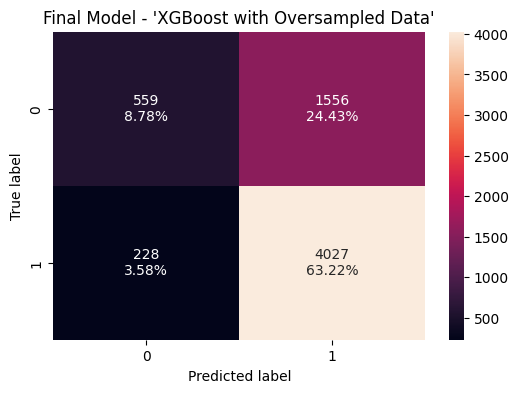

In [ ]:
confusion_matrix_sklearn(xgboost_tuned_model, X_test, y_test)
plt.title("Final Model - 'XGBoost with Oversampled Data'");

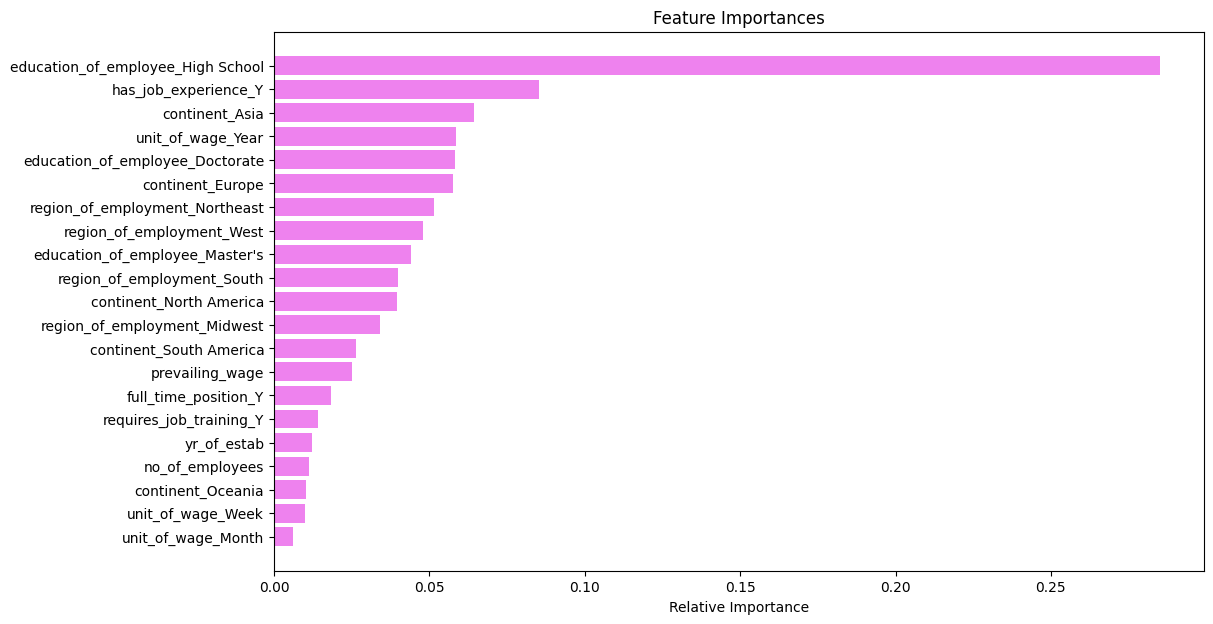

In [ ]:
# importance of features in the choosen Model
feature_names = list(X_train_oversampled.columns)           # Selecting the columns of all Independent Variables or Predictors
importances = xgboost_tuned_model.feature_importances_      # Calculate the importance of the features (Independent Variables)
indices = np.argsort(importances)                           # Sort the Importances by their index and descendent value

plt.figure(figsize=(12, 7))
plt.title("Feature Importances")
plt.barh(
    range(len(indices)),
    importances[indices],
    color="violet",
    align="center"
)
plt.yticks(
    range(len(indices)),
    [feature_names[i] for i in indices]
)
plt.xlabel("Relative Importance")
plt.tight_layout
plt.show()

## Actionable Insights and Recommendations

Based on the analysis of the optimized **XGBoost model** and the business objective, the following insights, recommendations and next steps are suggested for EasyVisa and the OFLC:
1.	Operational Integration of the Model
    - **Interface Development:** Create a user-friendly interface for OFLC staff to input candidate data and instantly receive a visa status prediction (Certified/Denied) along with a confidence score of the model.
    - **Automated Prioritization:** Use model predictions to automatically prioritize visa applications. Cases with high certification probability can be fast-tracked, while low-probability cases (predicted as “Denied”) can be inserted for manual review or feedback to applicants.
    - **Alerts for Potential Rejections:** The model can identify applications that may be certified but have risk factors that could lead to denial if not addressed, allowing OFLC to intervene proactively.

2.	Action Based on Certification Drivers
    - **Communicate Key Factors:** From feature importance analysis (visible in the plot above), identify and communicate to OFLC and applicants the main drivers of visa certification. For example:
        * Higher Education: Candidates with Master’s or Doctorates degrees show significantly higher certification rates. OFLC can focus on attracting these profiles.
        * Professional Experience: Candidates with work experience (Y) have substantially higher approval rates. Targeted actions can attract experienced professionals.
        * Salary Unit: Positions with annual salaries are more likely to be certified than those paid hourly, weekly, or monthly—suggesting a preference for full-time.
        * Continent of Origin: While Asia has the most applicants, **Europe** and **Africa** shows a **very high proportion of certified visas**. This can guide recruitment strategies.
    - **Recommendations to Employers/Candidates:** Based on these drivers, EasyVisa can advise employers on improving candidate eligibility and guide applicants on their profiles improvements (e.g., highlighting relevant experience, academic qualifications) before submitting applications.
3.	Continuous Monitoring and Retraining
    - **Real-Time Validation:** Implement a system to monitor model performance in production, tracking metrics (Recall, Precision, Accuracy, F1-score) on new data and comparing with expected results.
    - **Periodic Retraining:** Establish a schedule to retrain the model regularly (e.g., quarterly or semi-annually) with new data to ensure accuracy and relevance.
4.	Feedback Loop and Continuous Improvement
    - **Feedback Collection:** Create a mechanism for OFLC visa analysts to provide feedback on model prediction accuracy and tool usability. This feedback can be used to refine the model and system.
    - **Error Analysis:** Conduct in-depth analysis of model errors (False Positives and False Negatives) to identify patterns and areas for improvement.

By following these recommendations, EasyVisa can ensure that the model is not only effectively implemented but also delivers continuous value to OFLC, optimizing the visa certification process and supporting U.S. workforce needs.

<font size=6 color='blue'>Power Ahead</font>
___